# Вопросы DL

### Обратное распространение ошибки (backpropagation)  

это алгоритм, который используется для обучения нейронных сетей.  
Он основан на методе градиентного спуска и позволяет эффективно корректировать веса сети с целью минимизации функции потерь (ошибки).  

Кратко о сути обратного распространения ошибки:  
При подаче входных данных нейронная сеть делает предсказание (прямое распространение).  
Вычисляется ошибка — разница между предсказанным значением и правильным (целевым).  
Затем эта ошибка "распространяется обратно" по слоям сети (от выходного к входному).  
Вычисляются градиенты ошибки по весам нейронов с использованием производных функций активации.  
На основе градиентов обновляются веса сети, чтобы уменьшить ошибку.  


In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Входные данные
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Целевые значения
y = np.array([[0], [1], [1], [0]])

# Инициализация весов случайно
weights = np.random.rand(2, 1)

learning_rate = 0.5
for epoch in range(10000):
    # Прямое распространение
    input_layer = X
    outputs = sigmoid(np.dot(input_layer, weights))
    
    # Ошибка
    error = y - outputs
    
    # Обратное распространение (вычисление градиента)
    adjustments = error * sigmoid_derivative(outputs)
    
    # Обновление весов
    weights += learning_rate * np.dot(input_layer.T, adjustments)

print("Обученные веса:")
print(weights)


Обученные веса:
[[-3.33066907e-16]
 [ 1.45716772e-16]]


### Свертка, каскад сверток. Слои нейронной сети

__Свёртка в нейронных сетях (Convolution)__ 
Свёртка — это операция обработки многомерных данных (например, изображений), при которой применяется фильтр (ядро свёртки) — небольшая матрица весов.  
Фильтр «скользит» по входным данным, поэлементно умножая своё ядро на часть входа и суммируя результаты.  
Результатом является новая матрица (карта признаков), отражающая локальные особенности изображения, например, края, текстуры, формы.  
Каскад свёрток (несколько слоёв свёрток)  
Нейронная сеть содержит несколько сверточных слоёв, и каждый следующий слой получает на вход карты признаков предыдущего.  
На первых слоях обнаруживаются простые паттерны (края, углы), на более глубоких — сложные (группы краёв, объектные части).  
Такая каскадная архитектура напоминает восприятие человека: от общего к частному.  
Слои сверточной нейронной сети  
__Сверточный слой__ 
Применяет фильтры к входу, формируя карты признаков с обучаемыми весами.  
Пулинговый слой (Pooling)  
Уменьшает размерность карт признаков, выбирая наиболее информативные данные (напр., max-pooling выбирает максимумы). Это снижает вычислительные затраты и устойчивость к смещениям.  
__Нормализация__  
Улучшает обучение за счёт стабилизации распределения данных (batch normalization).  
Полносвязный (fully connected) слой  
Последний слой, где каждый нейрон соединён с каждым предыдущим, используется для классификации или регрессии на основе извлечённых признаков.  
Илюстрация процесса свёртки  
Вход — цветное изображение, представлено тремя матрицами (красный, зелёный, синий каналы).  
Фильтр (например, 3×3) последовательно накладывается на маленькие участки изображения.  
Результатом для каждого фильтра — свёрнутая карта признаков (feature map).  
Несколько фильтров формируют многоканальный выход.  

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Первый сверточный слой: вход 1 канал (например, grayscale), выход 32 канала, ядро 5x5
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        # Второй сверточный слой: вход 32 канала, выход 64 канала, ядро 5x5
        self.conv2 = nn.Conv2d(32, 64, 5, stride=1, padding=2)
        # MaxPool (пулинг) для уменьшения размерности
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout для регуляризации
        self.dropout = nn.Dropout(0.25)
        # Полносвязный слой: размерность зависит от входа после свёрток и пулинга
        self.fc1 = nn.Linear(64 * 7 * 7, 1000)  # при входе 28x28 (например, MNIST)
        self.fc2 = nn.Linear(1000, 10)          # 10 классов
        
    def forward(self, x):
        # Первый сверточный блок + ReLU + пулинг
        x = self.pool(F.relu(self.conv1(x)))
        # Второй сверточный блок + ReLU + пулинг
        x = self.pool(F.relu(self.conv2(x)))
        # Преобразуем тензор в вектор для полносвязных слоёв
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Создаём модель
model = SimpleCNN()

# Печатаем архитектуру сети
print(model)


### LSTM &#x2F; GRU рекурентые нейронные сети  
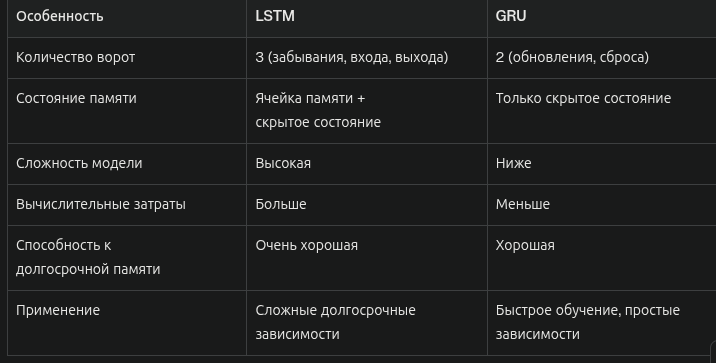

__LSTM (Long Short-Term Memory)__ 
Особенность LSTM — наличие ячейки памяти, которая хранит информацию длительное время.  
Имеет три типа ворот (гейтов):  
Ворота забывания (forget gates) — решают, какую информацию забыть.  
Входные ворота (input gates) — решают, какую новую информацию принять.  
Выходные ворота (output gates) — контролируют, какую информацию передать на выход и следующему шагу.  
Благодаря этим воротам LSTM может эффективно учиться на длинных последовательностях, избегая проблемы исчезающих градиентов.  
Используется в задачах обработки естественного языка, прогнозирования временных рядов, распознавания речи и др.  

__GRU (Gated Recurrent Unit)__  
Более упрощённый вариант LSTM, появившийся в 2014 году.  
Сочетает некоторые гейты, имеет два типа ворот:  
Ворота обновления (update gate) — контролируют, сколько старой информации сохранить.  
Ворота сброса (reset gate) — контролируют, какую часть прошлой информации забыть при вычислении нового состояния.  
В GRU отсутствует отдельная ячейка памяти, используется только скрытое состояние, что делает модель легче и быстрее в обучении.  
Часто показывает почти такое же качество, как LSTM, при меньших вычислительных затратах, что делает её популярным выбором.  

In [ ]:
import torch
import torch.nn as nn

# Определяем LSTM модель для задачи классификации последовательностей
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # берем выход последнего временного шага
        out = self.fc(out)
        return out

# Параметры
model = LSTMModel(input_size=10, hidden_size=20, output_size=5, num_layers=2)
print(model)



class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

model = GRUModel(input_size=10, hidden_size=20, output_size=5, num_layers=2)
print(model)


###  Введение в NLP. Трансформер, BERT


__Основные задачи NLP__ 
Разбиение текста: токенизация (разделение на слова, предложения).  
Лемматизация и стемминг (приведение слов к базовой форме).  
Распознавание частей речи (POS-теггинг).  
Определение семантики (смысл слов и предложений).  
Анализ тональности (определение эмоциональной окраски текста).  
Извлечение именованных сущностей (люди, организации, места и др.).  
Машинный перевод, генерация текста и ответов на вопросы.  
Распознавание и синтез речи.

__Трансформер (Transformer)__ 
Архитектура нейронных сетей, предложенная в 2017 году, которая стала прорывом для задач NLP.  
Основывается на механизме внимания (attention), позволяющем сети фокусироваться на разных частях входа, независимо от их позиции.  
Позволяет обучать модели быстрее и эффективнее без рекуррентных или свёрточных слоёв.  
Используется для задач перевода, генерации текста, анализа и других.

__BERT (Bidirectional Encoder Representations from Transformers)__
Модель, построенная на основе архитектуры трансформера.  
Особенность BERT — двунаправленное внимание: модель учитывает контекст слова с обеих сторон в предложении.  
Предварительно обучена на большом корпусе текста (unsupervised pre-training) для понимания языка.  
Позволяет значительно повысить качество в задачах понимания текста: поиск, классификация, вопросы-ответы.  
После предварительного обучения модель можно дообучить на конкретных задачах (fine-tuning). 

### Эмбединги  
это способ представления объектов (слов, изображений, звуков и др.) в виде числовых векторов фиксированной размерности,  
которые отражают их суть и связь с другими объектами.  
Это один из ключевых компонентов современных методов машинного обучения и глубокого обучения.  

__Эмбеддинг__ слова — вектор, который содержит информацию о его значении и контексте.  
Благодаря эмбеддингам компьютер понимает, что слова «кошка» и «котенок» близки по смыслу, а не просто набор символов.  
Примеры популярных предобученных эмбеддингов: Word2Vec, GloVe, FastText.  


__ELMo__ (Embeddings from Language Models) — модель эмбеддингов, которая генерирует контекстуальные (динамические) эмбеддинги слов.  
В отличие от традиционных моделей (Word2Vec и др.), где каждому слову соответствует один фиксированный вектор,  
ELMo учитывает контекст слова в предложении — для одного и того же слова в разных предложениях будут разные эмбеддинги.  
ELMo построен на двухслойных би-рекуррентных нейронных сетях (LSTM), обученных для предсказания текста.  
Это значительно улучшает понимание смысла и помогает в различных NLP-задачах: анализ тональности, распознавание вопросов, машинный перевод.  

__В задачах CV эмбеддинги__ — это векторные представления изображений или их частей, получаемые обычно из последних слоёв нейронных сетей (например, CNN).  
Эти эмбеддинги можно использовать для сравнения изображений, поиска похожих, классификации, сегментации и др.  
Метрики сравнения эмбеддингов (косинусное сходство, евклидово расстояние) позволяют оценить степень похожести объектов.  

